In [1]:
dataset_path=r"C:\Users\DELL\TrashBox\TrashBox_train_dataset_subfolders"

In [2]:
import os 
cardboard=os.path.join(dataset_path,"cardboard")
e_waste=os.path.join(dataset_path,"e-waste")
ew_cables=os.path.join(e_waste,"cables")
ew_chips=os.path.join(e_waste,"chips")
ew_laptops=os.path.join(e_waste,"laptops")
ew_smallapp=os.path.join(e_waste,"small appliances")
ew_smart=os.path.join(e_waste,"smartphones")

In [3]:
glass=os.path.join(dataset_path,"glass")
medical=os.path.join(dataset_path,"medical")
medical_gloves=os.path.join(medical,"gloves")
medical_masks=os.path.join(medical,"masks")
medical_medicines=os.path.join(medical,"medicines")
medical_syringe=os.path.join(medical,"syringe")


In [4]:
metal=os.path.join(dataset_path,"metal")
cans=os.path.join(metal,"beverage cans")
construction_scrap=os.path.join(metal,"scrap")
containers=os.path.join(metal,"containers")
obj=os.path.join(metal,"other metal objects")
spray=os.path.join(metal,"spray cans")

In [5]:
paper=os.path.join(dataset_path,"paper")
news=os.path.join(paper,"news paper")
paper1=os.path.join(paper,"paper cups")
pak=os.path.join(paper,"tetra pak")

In [6]:
plastic=os.path.join(dataset_path,"plastic")
butt=os.path.join(plastic,"cigarette butt")
bags=os.path.join(plastic,"plastic bags")
bottle=os.path.join(plastic,"bottles")
containers=os.path.join(plastic,"plastic containers")
cups=os.path.join(plastic,"plastic cups")

In [21]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths for validation and test sets
validation_path = r"C:\Users\DELL\TrashBox\validation"
test_path = r"C:\Users\DELL\TrashBox\test"

# Function to split data into validation and test sets while preserving folder structure
def split_data(source, dest_validation, dest_test, split_ratio=0.2):
    # Create validation and test directories if they don't exist
    os.makedirs(dest_validation, exist_ok=True)
    os.makedirs(dest_test, exist_ok=True)

    # Walk through the source directory and preserve the structure
    for root, dirs, files in os.walk(source):
        # Filter out non-image files
        files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

        if not files:
            continue

        # Split files into validation and test sets
        files_train, files_test = train_test_split(files, test_size=split_ratio, random_state=42)

        # Create corresponding folders in validation and test sets
        dest_root_validation = os.path.join(dest_validation, os.path.relpath(root, source))
        dest_root_test = os.path.join(dest_test, os.path.relpath(root, source))
        os.makedirs(dest_root_validation, exist_ok=True)
        os.makedirs(dest_root_test, exist_ok=True)

        # Move files to validation and test sets
        for file in files_test:
            source_file = os.path.join(root, file)
            dest_file = os.path.join(dest_root_test, file)
            shutil.move(source_file, dest_file)

        for file in files_train:
            source_file = os.path.join(root, file)
            dest_file = os.path.join(dest_root_validation, file)
            shutil.move(source_file, dest_file)

# Split data into validation and test sets
split_data(dataset_path, validation_path, test_path)


In [24]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths for train, validation, and test sets
train_path = r"C:\Users\DELL\TrashBox\train"
validation_path = r"C:\Users\DELL\TrashBox\valid"
test_path = r"C:\Users\DELL\TrashBox\test"

# Create train, validation, and test directories
os.makedirs(train_path, exist_ok=True)
os.makedirs(validation_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Function to split data into train, validation, and test sets while preserving folder structure
def split_data(source, dest_train, dest_validation, dest_test, split_ratio=(0.7, 0.2, 0.1)):
    # Walk through the source directory and preserve the structure
    for root, dirs, files in os.walk(source):
        # Filter out non-image files
        files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

        if not files:
            continue

        # Split files into train, validation, and test sets
        files_train, files_temp = train_test_split(files, test_size=(split_ratio[1] + split_ratio[2]), random_state=42)
        files_validation, files_test = train_test_split(files_temp, test_size=split_ratio[2]/(split_ratio[1] + split_ratio[2]), random_state=42)

        # Create corresponding folders in train, validation, and test sets
        dest_root_train = os.path.join(dest_train, os.path.relpath(root, source))
        dest_root_validation = os.path.join(dest_validation, os.path.relpath(root, source))
        dest_root_test = os.path.join(dest_test, os.path.relpath(root, source))

        os.makedirs(dest_root_train, exist_ok=True)
        os.makedirs(dest_root_validation, exist_ok=True)
        os.makedirs(dest_root_test, exist_ok=True)

        # Move files to train, validation, and test sets
        for file in files_train:
            source_file = os.path.join(root, file)
            dest_file = os.path.join(dest_root_train, file)
            shutil.move(source_file, dest_file)

        for file in files_validation:
            source_file = os.path.join(root, file)
            dest_file = os.path.join(dest_root_validation, file)
            shutil.move(source_file, dest_file)

        for file in files_test:
            source_file = os.path.join(root, file)
            dest_file = os.path.join(dest_root_test, file)
            shutil.move(source_file, dest_file)

# Replace 'dataset_path' with the actual path to your original dataset
split_data(r"C:\Users\DELL\TrashBox\TrashBox_train_dataset_subfolders", train_path, validation_path, test_path)


In [7]:
train_path=r"C:\Users\DELL\TrashBox\train"
test_path=r"C:\Users\DELL\TrashBox\test"
valid_path=r"C:\Users\DELL\TrashBox\valid"

In [42]:
import os
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from PIL import Image

# Define the paths for train, validation, and test sets
train_path = r"C:\Users\DELL\TrashBox\train"
test_path = r"C:\Users\DELL\TrashBox\test"
valid_path = r"C:\Users\DELL\TrashBox\valid"

# Set up data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Set up generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Build DenseNet-201 model
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

num_classes = len(train_generator.class_indices)

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
model_save_path = 'densenet201_trashbox_model.h5'
checkpoint = ModelCheckpoint(model_save_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-7)

# Train the model with exception handling
history = None  # Initialize history variable
problematic_images = []  # List to store paths of problematic images

try:
    history = model.fit(
        train_generator,
        epochs=10,  # Adjust the number of epochs as needed
        validation_data=validation_generator,
        callbacks=[checkpoint, reduce_lr]
    )
except Exception as e:
    print(f"Error during training: {str(e)}")

    # Identify the problematic image causing the error
    for root, dirs, files in os.walk(train_path):
        for file in files:
            image_path = os.path.join(root, file)
            try:
                img = Image.open(image_path)
            except Exception as e:
                print(f"Error opening image {image_path}: {str(e)}")
                problematic_images.append(image_path)

# Evaluate the model on the test set if training was successful
if history is not None:
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    test_loss, test_acc = model.evaluate(test_generator)
    print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Print paths of problematic images
if problematic_images:
    print("\nProblematic Images:")
    for img_path in problematic_images:
        print(img_path)


Found 9134 images belonging to 7 classes.
Found 2614 images belonging to 7 classes.
Epoch 1/10
286/286 [==============================] - ETA: 0s - loss: 0.8899 - accuracy: 0.6915
Epoch 1: val_accuracy improved from -inf to 0.82632, saving model to densenet201_trashbox_model.h5


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


286/286 [==============================] - 1520s 5s/step - loss: 0.8899 - accuracy: 0.6915 - val_loss: 0.5180 - val_accuracy: 0.8263 - lr: 0.0010
Epoch 2/10
286/286 [==============================] - ETA: 0s - loss: 0.5665 - accuracy: 0.8081
Epoch 2: val_accuracy improved from 0.82632 to 0.84736, saving model to densenet201_trashbox_model.h5
286/286 [==============================] - 1520s 5s/step - loss: 0.5665 - accuracy: 0.8081 - val_loss: 0.4405 - val_accuracy: 0.8474 - lr: 0.0010
Epoch 3/10
286/286 [==============================] - ETA: 0s - loss: 0.4815 - accuracy: 0.8350
Epoch 3: val_accuracy improved from 0.84736 to 0.85004, saving model to densenet201_trashbox_model.h5
286/286 [==============================] - 1193s 4s/step - loss: 0.4815 - accuracy: 0.8350 - val_loss: 0.4335 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 4/10
194/286 [===================>..........] - ETA: 4:44 - loss: 0.4478 - accuracy: 0.8520

In [11]:
import os
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Define the paths for train, validation, and test sets
train_path = r"C:\Users\DELL\TrashBox\train"
test_path = r"C:\Users\DELL\TrashBox\test"
valid_path = r"C:\Users\DELL\TrashBox\valid"

# Set up data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Set up generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Build or load DenseNet-201 model
model_path = 'densenet201_trashbox_model.h5'

if os.path.exists(model_path):
    # Load the previously saved model
    loaded_model = tf.keras.models.load_model(model_path)
else:
    # Build DenseNet-201 model if it doesn't exist
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    num_classes = len(train_generator.class_indices)

    loaded_model = tf.keras.models.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

# Compile the model
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-7)

# Continue training with additional epochs
additional_epochs = 10  # You can adjust the number of additional epochs

history = loaded_model.fit(
    train_generator,
    epochs=loaded_model.optimizer.iterations.numpy() + additional_epochs,  # Calculate the total number of epochs
    validation_data=validation_generator,
    callbacks=[checkpoint, reduce_lr]
)

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_acc = loaded_model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


Found 9134 images belonging to 7 classes.
Found 2614 images belonging to 7 classes.
Epoch 1/10
 13/286 [>.............................] - ETA: 15:37 - loss: 0.1764 - accuracy: 0.9375

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


286/286 [==============================] - ETA: 0s - loss: 0.1906 - accuracy: 0.9315
Epoch 1: val_accuracy improved from -inf to 0.88141, saving model to densenet201_trashbox_model.h5


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


286/286 [==============================] - 1396s 5s/step - loss: 0.1906 - accuracy: 0.9315 - val_loss: 0.4138 - val_accuracy: 0.8814 - lr: 0.0010
Epoch 2/10
286/286 [==============================] - ETA: 0s - loss: 0.1819 - accuracy: 0.9306
Epoch 2: val_accuracy did not improve from 0.88141
286/286 [==============================] - 1334s 5s/step - loss: 0.1819 - accuracy: 0.9306 - val_loss: 0.4298 - val_accuracy: 0.8776 - lr: 0.0010
Epoch 3/10
286/286 [==============================] - ETA: 0s - loss: 0.1773 - accuracy: 0.9370
Epoch 3: val_accuracy did not improve from 0.88141
286/286 [==============================] - 1419s 5s/step - loss: 0.1773 - accuracy: 0.9370 - val_loss: 0.4443 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 4/10
242/286 [========================>.....] - ETA: 4:09 - loss: 0.1816 - accuracy: 0.9313

KeyboardInterrupt: 

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the trained model
model_path = 'densenet201_trashbox_model.h5'
model = load_model(model_path)

# Define the paths for train, validation, and test sets
train_path = r"C:\Users\DELL\TrashBox\train"

# Set up data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Set up the train generator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Create a list of class labels
class_labels = list(train_generator.class_indices.keys())

def predict_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Predict the class probabilities for the input image
    predictions = model.predict(img_array)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    return predicted_class

# Example usage:
image_path = r"C:\Users\DELL\TrashBox\test\plastic\plastic containers\plastic_containers 534.jpg"
prediction = predict_image(image_path)
print(f'The predicted class for the provided image is: {prediction}')


In [1]:
pip install cython

Defaulting to user installation because normal site-packages is not writeable
  Using cached Cython-3.0.8-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
Using cached Cython-3.0.8-cp311-cp311-win_amd64.whl (2.8 MB)
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [2]:
pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/philferriere/cocoapi.git to c:\users\dell\appdata\local\temp\pip-req-build-sawa46ax
  Resolved https://github.com/philferriere/cocoapi.git to commit 2929bd2ef6b451054755dfd7ceb09278f935f7ad
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pycocotools
Failed to build pycocotools
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Running command git clone --filter=blob:none --quiet https://github.com/philferriere/cocoapi.git 'C:\Users\DELL\AppData\Local\Temp\pip-req-build-sawa46ax'
  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [1 lines of output]
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pycocotools
  error: subprocess-exited-with-error
  
  python setup.py clean did not run successfully.
  exit code: 1


Found 1324 images belonging to 7 classes.
42/42 [==============================] - 233s 5s/step


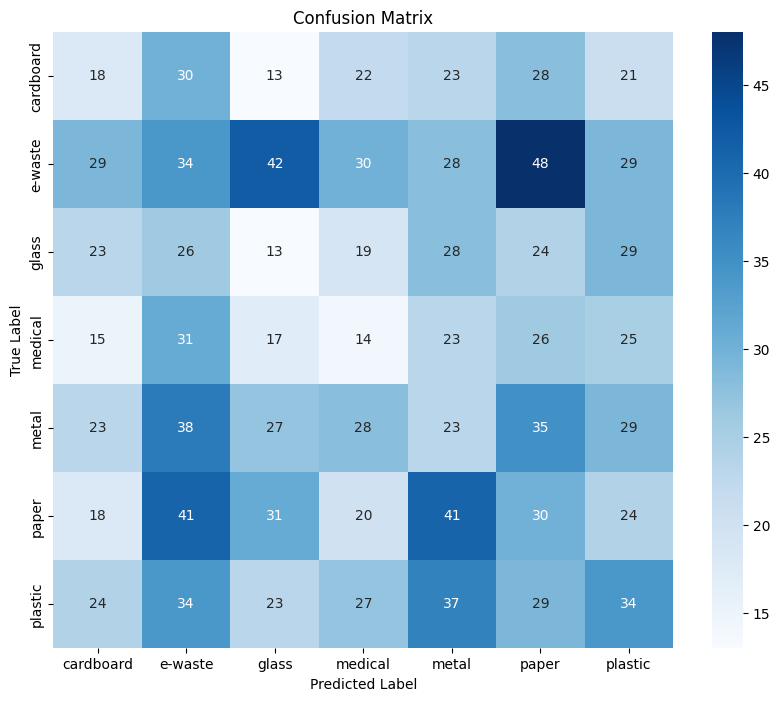

Classification Report:
               precision    recall  f1-score   support

   cardboard       0.12      0.12      0.12       155
     e-waste       0.15      0.14      0.14       240
       glass       0.08      0.08      0.08       162
     medical       0.09      0.09      0.09       151
       metal       0.11      0.11      0.11       203
       paper       0.14      0.15      0.14       205
     plastic       0.18      0.16      0.17       208

    accuracy                           0.13      1324
   macro avg       0.12      0.12      0.12      1324
weighted avg       0.13      0.13      0.13      1324



In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
# Generate predictions for the test set
predictions = loaded_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("Classification Report:\n", classification_report(true_classes, predicted_classes, target_names=train_generator.class_indices.keys()))
